<a href="https://colab.research.google.com/github/azizmumin/UAS-TeknologiOpenSource/blob/master/UasTeknologiOpenSource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle

In [ ]:
!ls ~/.kaggle

kaggle.json


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle kernels list --user azizmumin --sort-by dateRun

ref                           title               author      lastRunTime          totalVotes  
----------------------------  ------------------  ----------  -------------------  ----------  
azizmumin/notebook7e793feb02  notebook7e793feb02  Aziz Mumin  2023-06-29 07:03:21           0  
azizmumin/notebooke341fa1472  notebooke341fa1472  Aziz Mumin  2023-06-18 07:32:42           0  


In [ ]:
!kaggle datasets download -d arashnic/covid19-case-surveillance-public-use-dataset

100% 46.0M/46.0M [00:00<00:00, 77.4MB/s]
100% 46.0M/46.0M [00:00<00:00, 57.8MB/s]


In [ ]:
!unzip -q covid19-case-surveillance-public-use-dataset.zip

In [ ]:
!cp /content/COVID-19_Case_Surveillance_Public_Use_Data.csv /content/drive/MyDrive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#memuat csv sebagai data frame
uas_df = pd.read_csv('/content/drive/MyDrive/COVID-19_Case_Surveillance_Public_Use_Data.csv')
uas_df.head()

<ipython-input-18-b1f0c06ea403>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  uas_df = pd.read_csv('/content/drive/MyDrive/COVID-19_Case_Surveillance_Public_Use_Data.csv')


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [ ]:
#identify shape dataset (Baris, Kolom)
uas_df.shape

(8405079, 11)

In [ ]:
#identify informasi dataset
uas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


In [ ]:
#menghitung kolom dengan data null
uas_df.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

<Axes: >

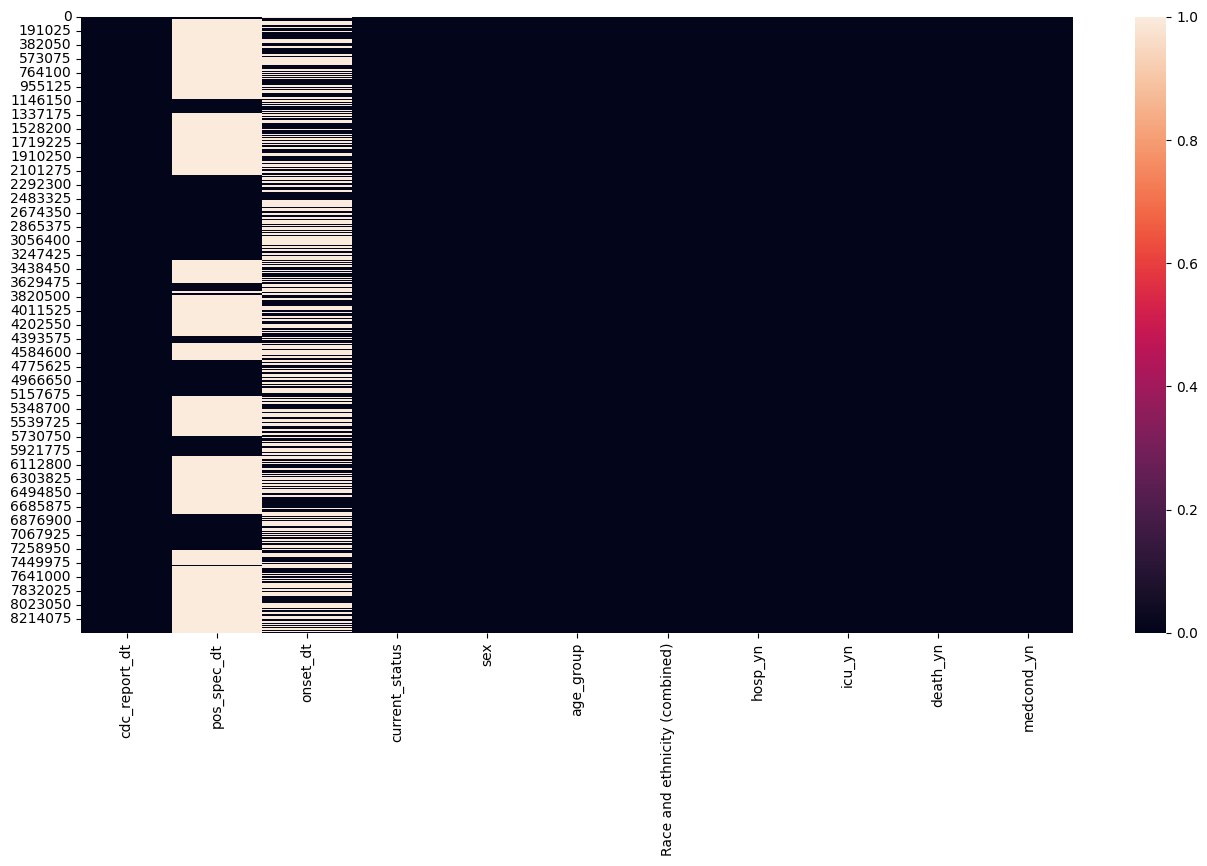

In [ ]:
#menampilkan heatmap kolom dengan data null
plt.figure(figsize=(16,8))
sns.heatmap(uas_df.isnull())

In [ ]:
#mengisi data null pada kolom pos_spec_dt dengan "No Date"
uas_df["pos_spec_dt"].fillna("No Date", inplace = True)

(8405079,)

In [ ]:
#menghitung kolom dengan data null
uas_df.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                            0
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

In [ ]:
#mengisi data null pada kolom onset_dt dengan "No Date"
uas_df["onset_dt"].fillna("No Date", inplace = True)

In [ ]:
uas_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,No Date,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,No Date,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [ ]:
#menghitung kolom dengan data null
uas_df.isnull().sum()

cdc_report_dt                     0
pos_spec_dt                       0
onset_dt                          0
current_status                    0
sex                              18
age_group                        89
Race and ethnicity (combined)     7
hosp_yn                           0
icu_yn                            0
death_yn                          0
medcond_yn                        0
dtype: int64

In [ ]:
na_cols = (uas_df.isna().sum())
na_cols[na_cols > 0]

age_group    71
dtype: int64

In [ ]:
uas_df['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

In [ ]:
uas_df.shape

(8405061, 11)

In [ ]:
#menghapus data pada kolom age_group dengan data Unknown
uas_df['age_group'].replace('Unknown', np.nan, inplace=True)
uas_df.dropna(subset=['age_group'], inplace=True)

In [ ]:
uas_df['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Name: age_group, dtype: int64

In [ ]:
uas_df.isnull().sum()

cdc_report_dt                    0
pos_spec_dt                      0
onset_dt                         0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

In [ ]:
uas_df.shape

(8373038, 11)

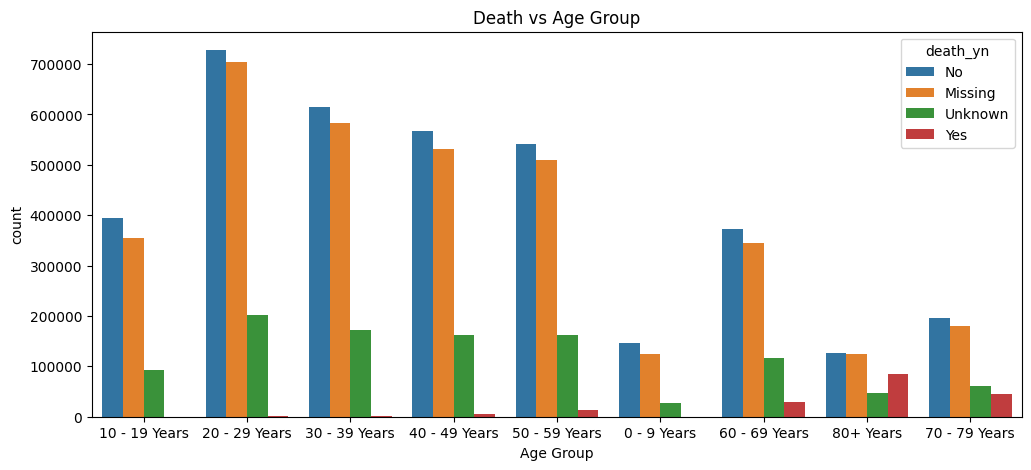

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=uas_df['age_group'],hue=uas_df['death_yn'])
plt.title('Death vs Age Group')
plt.xlabel('Age Group')
plt.show()

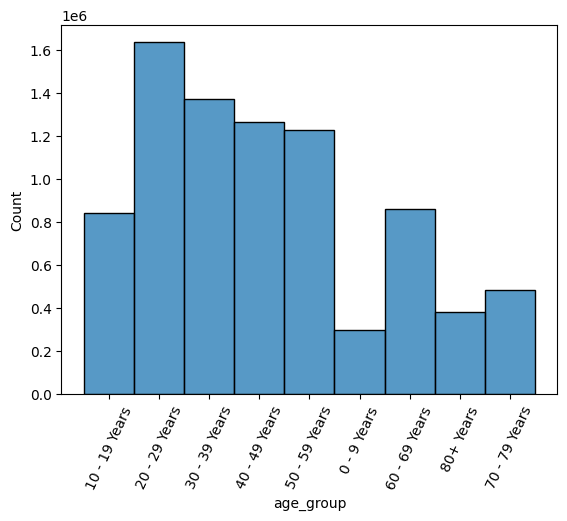

In [ ]:
sns.histplot(data=uas_df, x="age_group");
plt.xticks(rotation=65);

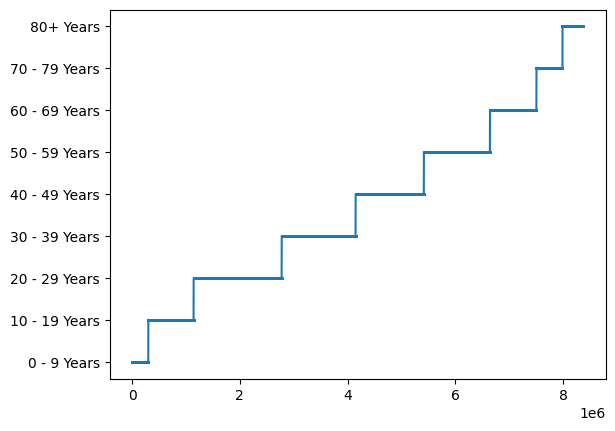

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.sort(uas_df['age_group']), marker='o', markersize=1)